In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [117]:
#brakes_suspension_health_codered_FINAL.csv"
df_brakes=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\data\\brakes_suspension_health.csv")
df_brakes  

,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
0,1,94.283911,92.901836,3.909731,7.708527,2.210066
1,2,65.004555,32.549083,2.902351,6.556763,2.742707
2,3,35.209273,33.442173,5.274002,3.341922,5.429526
3,4,27.237433,77.737493,5.026149,5.794107,6.016755
4,5,26.851440,68.373992,6.949559,5.414857,6.434058
...,...,...,...,...,...,...
5995,5996,35.703268,62.410259,4.806734,2.113005,3.460964
5996,5997,65.072997,49.886541,5.091943,7.166963,5.654246
5997,5998,57.515548,51.023682,8.586898,5.647725,6.548819
5998,5999,19.966639,30.606864,3.264978,7.599740,6.561412


In [118]:
df_brakes.head()


,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
0,1,94.283911,92.901836,3.909731,7.708527,2.210066
1,2,65.004555,32.549083,2.902351,6.556763,2.742707
2,3,35.209273,33.442173,5.274002,3.341922,5.429526
3,4,27.237433,77.737493,5.026149,5.794107,6.016755
4,5,26.851440,68.373992,6.949559,5.414857,6.434058


In [119]:
df_brakes.tail()

,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
5995,5996,35.703268,62.410259,4.806734,2.113005,3.460964
5996,5997,65.072997,49.886541,5.091943,7.166963,5.654246
5997,5998,57.515548,51.023682,8.586898,5.647725,6.548819
5998,5999,19.966639,30.606864,3.264978,7.599740,6.561412
5999,6000,NaN,50.692829,7.524154,3.131537,2.780421


In [120]:
df_brakes.isna().sum()

Car_ID                                 0
Brake_Pad_Wear                       248
Brake_Fluid_Level                    232
Suspension_Stiffness                 155
Shock_Absorber_Condition               0
Brakes_Suspension_Remaining_Years      0
dtype: int64

In [121]:
df_brakes.dtypes

Car_ID                                 int64
Brake_Pad_Wear                       float64
Brake_Fluid_Level                    float64
Suspension_Stiffness                 float64
Shock_Absorber_Condition             float64
Brakes_Suspension_Remaining_Years    float64
dtype: object

In [122]:
df_brakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Car_ID                             6000 non-null   int64  
 1   Brake_Pad_Wear                     5752 non-null   float64
 2   Brake_Fluid_Level                  5768 non-null   float64
 3   Suspension_Stiffness               5845 non-null   float64
 4   Shock_Absorber_Condition           6000 non-null   float64
 5   Brakes_Suspension_Remaining_Years  6000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 281.4 KB


In [123]:
df_brakes.describe()

,Car_ID,Brake_Pad_Wear,Brake_Fluid_Level,Suspension_Stiffness,Shock_Absorber_Condition,Brakes_Suspension_Remaining_Years
count,6000.000000,5752.000000,5768.000000,5845.000000,6000.000000,6000.000000
mean,3000.500000,50.250063,49.542662,4.984485,4.988875,5.098467
std,1732.195139,22.658660,22.150413,2.163801,2.156169,1.598451
min,1.000000,1.257796,0.644989,0.121433,0.116880,0.200000
25%,1500.750000,32.935661,32.766108,3.309932,3.349212,4.012379
50%,3000.500000,50.586774,49.601547,4.985663,4.980405,5.112392
75%,4500.250000,67.612084,66.427289,6.634716,6.605026,6.191478
max,6000.000000,99.762493,98.553103,9.898946,9.884330,10.000000


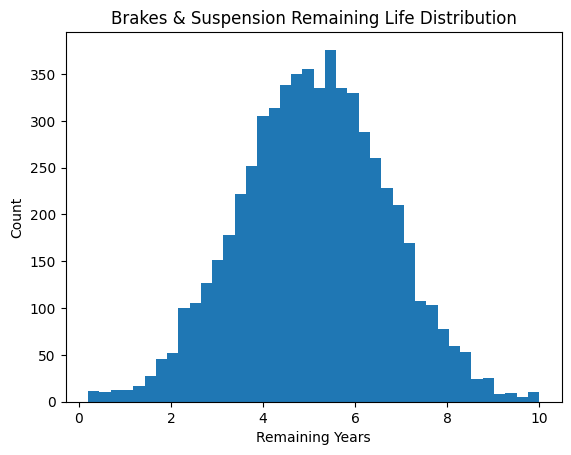

In [124]:
plt.hist(df_brakes["Brakes_Suspension_Remaining_Years"], bins=40)
plt.xlabel("Remaining Years")
plt.ylabel("Count")
plt.title("Brakes & Suspension Remaining Life Distribution")
plt.show()


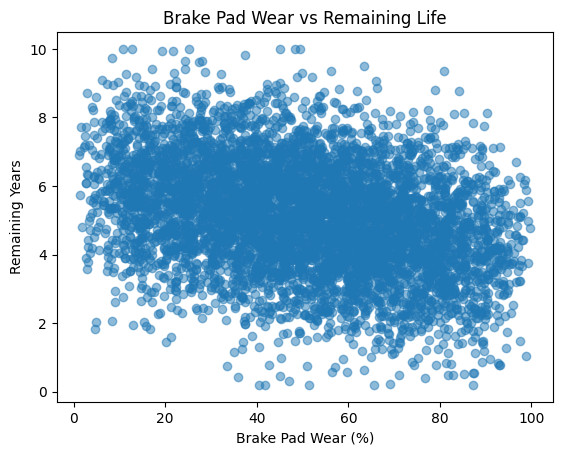

In [125]:
plt.scatter(
    df_brakes["Brake_Pad_Wear"],
    df_brakes["Brakes_Suspension_Remaining_Years"],
    alpha=0.5
)
plt.xlabel("Brake Pad Wear (%)")
plt.ylabel("Remaining Years")
plt.title("Brake Pad Wear vs Remaining Life")
plt.show()


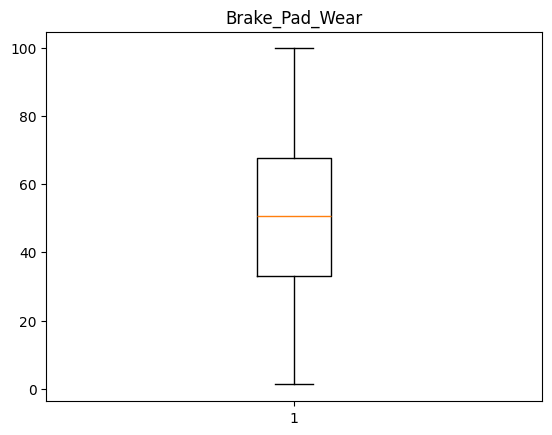

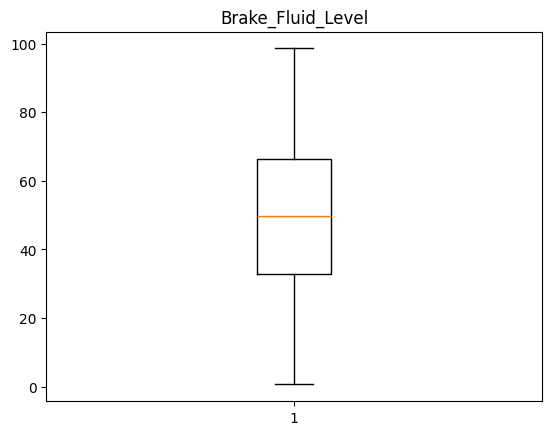

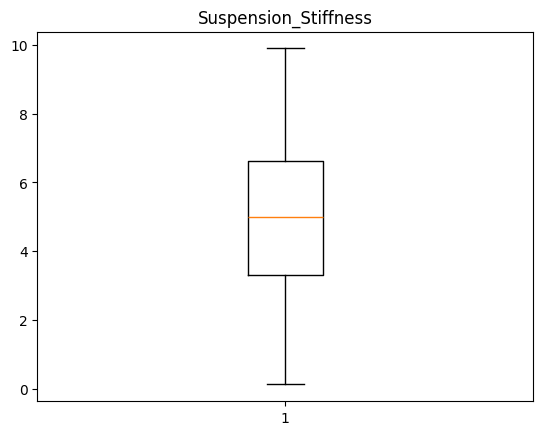

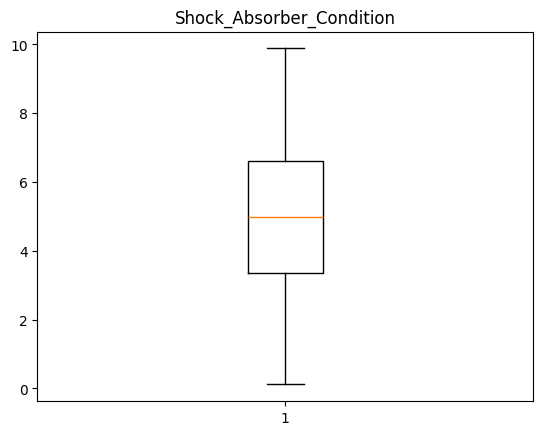

In [126]:
features = [
    "Brake_Pad_Wear",
    "Brake_Fluid_Level",
    "Suspension_Stiffness",
    "Shock_Absorber_Condition"
]

for col in features:
    plt.boxplot(df_brakes[col].dropna())
    plt.title(col)
    plt.show()


In [127]:
x = df_brakes.drop(
    columns=["Brakes_Suspension_Remaining_Years", "Car_ID"]
)
y = df_brakes["Brakes_Suspension_Remaining_Years"]

for col in x.columns:
    x[col] = x[col].fillna(x[col].median())


In [128]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


In [129]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42
)


In [130]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=8,
    random_state=42
)


model.fit(x_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [131]:
y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 0.9946258274352769
RMSE: 1.2501415986648994
R2  : 0.40433376754713335


In [133]:
import joblib

joblib.dump(model, "brakes_model.pkl")

['brakes_model.pkl']